# User referal program
1. estimate the impact the program has on the site
2. Based on the data, what would you suggest to do as a next step?
3. risks approach present, think of a better way to test the referral program and measure the impact

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

In [31]:
df = pd.read_csv('referral.csv',parse_dates= ['date'])

In [32]:
df.head()

,user_id,date,country,money_spent,is_referral,device_id
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97341 entries, 0 to 97340
Data columns (total 6 columns):
user_id        97341 non-null int64
date           97341 non-null datetime64[ns]
country        97341 non-null object
money_spent    97341 non-null int64
is_referral    97341 non-null int64
device_id      97341 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.5+ MB


In [34]:
df['month']= df['date'].apply(lambda x: x.month)
df['day']= df['date'].apply(lambda x: x.day)
df['week']= df['date'].apply(lambda x: x.dayofweek)

In [35]:
df.head()

,user_id,date,country,money_spent,is_referral,device_id,month,day,week
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,10,3,5
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX,10,3,5
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG,10,3,5
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH,10,3,5
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH,10,3,5


In [36]:
df.loc[df['month'] == 10, 'money_spent'].mean()

42.669988531656585

In [37]:
df.loc[df['month'] != 10, 'money_spent'].mean()

46.87935937733872

We do see an increase in the mean value of money spent after the user referral program

In [38]:
referred = df.loc[(df['month'] != 10) & (df['is_referral'] ==0 ), 'money_spent']
nreferred = df.loc[(df['month'] != 10) & (df['is_referral'] ==1 ), 'money_spent']

In [41]:
s, p =ttest_ind(referred, nreferred)
p

0.54938401562328698

## Referred not and referred transactions are not independent

In [60]:
# Check how the mean value changes over the dates
sum_spent = df.groupby(['week'])['money_spent'].sum()
#df.plot(kind= 'bar',sum_spent)
sum_spent= pd.DataFrame(sum_spent)
sum_spent = sum_spent.reset_index()
sum_spent.head()

,week,money_spent
0,0,424134
1,1,419225
2,2,418835
3,3,421953
4,4,420633


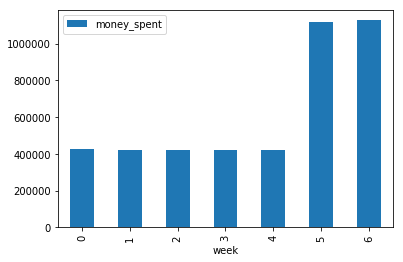

In [62]:

sum_spent.plot(kind= 'bar', x= 'week', y= 'money_spent')


We can see the money spent was mostly on weekends. 
It does look as if it is increasing after using referal program.

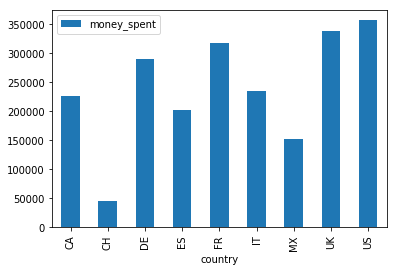

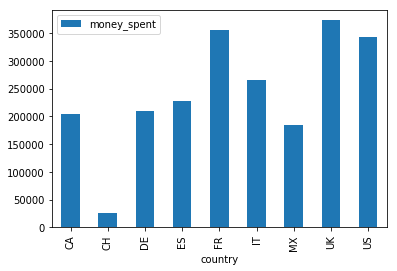

In [69]:
# Check how the mean value changes for different countries
sum_spent1 = df[df['month'] == 10].groupby(['country'])['money_spent'].sum()
#df.plot(kind= 'bar',sum_spent)
sum_spent1= pd.DataFrame(sum_spent1)
sum_spent1 = sum_spent1.reset_index()
sum_spent2 = df[df['month'] != 10].groupby(['country'])['money_spent'].sum()
#df.plot(kind= 'bar',sum_spent)
sum_spent2= pd.DataFrame(sum_spent2)
#sum_spent2
sum_spent2 = sum_spent2.reset_index()
sum_spent1.plot(kind= 'bar', x= 'country', y= 'money_spent')
sum_spent2.plot(kind= 'bar', x= 'country', y= 'money_spent')

In [79]:
# Check how the mean value changes for different device id
sum_spent1 = df[df['month'] == 10].groupby(['device_id'])['money_spent'].sum()
len(df.loc[df['month'] == 10, 'device_id'].unique()), len(df.loc[df['month'] == 11, 'device_id'].unique())

(9396, 14778)

In [81]:
df[df['month'] == 11].groupby(['is_referral'])['money_spent'].count()

is_referral
0    20560
1    26207
Name: money_spent, dtype: int64

# A better way of testing, use A/B test, make sure the data is not biased